## Import libraries and setup

In [1]:
import pandas as pd
import numpy as np
import itertools

import optuna

import datetime
from datetime import timedelta

from tqdm import tqdm

import seaborn as sns
import plotly.graph_objects as go

import logging

import sys
sys.path.append("S://Docs//Personal//MAEVE//MAEVE-II//2_Backtesting//Scripts//")

import BackTester as bt

In [2]:

init_cash = 10000.00

data_loc = "S://Docs//Personal//MAEVE//Data//"

log_loc = "S://Docs//Personal//MAEVE//Data//logs//MAEVE2_t3_backtest.log"

# Log file set up
logging.basicConfig(filename=log_loc, level=logging.INFO)

## Read in data

In [3]:
path = data_loc + "BTC_price_1h.csv"
btc_df = pd.read_csv(path)

print(f"Data shape: {btc_df.shape}")

print(f"Date range: {btc_df.Datetime.min()} - {btc_df.Datetime.max()}")

Data shape: (17017, 7)
Date range: 2021-02-01 00:00:00+00:00 - 2023-01-20 13:00:00+00:00


## Calculate Technical Indicators

In [4]:
bt1 = bt.BackTester(btc_df, mode="opt")

In [5]:
# Calculate MA
MALst = [8, 12, 20, 21, 24, 30, 40, 48, 50, 60, 100, 200]

for MA in MALst:
    btc_df = bt1.calc_MA(btc_df, MA)


# Calculate ATR
ATRLst1 = list(range(7,71,7))
ATRLst2 = list(range(5,51,5))

ATRLst = list(set(ATRLst1 + ATRLst2))

for ATR in ATRLst:
    btc_df = bt1.calc_ATR(btc_df, ATR)


btc_df.shape

(17017, 38)

## Testing

In [6]:
# MA1,MA2,mult1,ATR1,MA3,MA4,mult2,ATR2,stoploss,streaklim,trailing

# 'MA8','MA40',4.0,'ATR56','MA8','MA40',4.0,'ATR56',0.05,0,True -> 159.54

# 'MA8','MA30',3.0,'ATR49','MA48','MA30',2.5,'ATR35',0.05,0,True -> 271.87


# BUY
MA1 = 'MA8' 
MA2 = 'MA30'
mult1 = 3
ATR1 = 'ATR49'

# SELL
MA3 = 'MA48'
MA4 = 'MA30'
mult2 = 2.5
ATR2 = 'ATR35'

# Position management
stoploss = 0.05
streaklim = 0
trailing = True

In [7]:
bt1 = bt.BackTester(btc_df, mode="opt")
backtest_df, trades_df, figs, summary = bt1.maeve2_t3_backtest((MA1,MA2,mult1,ATR1,MA3,MA4,mult2,ATR2,stoploss,streaklim,trailing))

In [8]:
backtest_df

,strategy_id,strategy_type,timeframe,MA1,MA2,mult1,ATR1,MA3,MA4,mult2,ATR2,stoploss,streaklim,trailing,profit/loss
0,HODL-alltime,HODL,alltime,,,,,,,,,,,,-35.23
1,DCA-alltime,DCA,alltime,,,,,,,,,,,,-35.23
2,MAEVE-BUY-MA8-MA30-3-ATR49-SELL-MA48-MA30-2.5-...,MAEVE,alltime,MA8,MA30,3,ATR49,MA48,MA30,2.5,ATR35,0.05,0,True,271.87
3,HODL-bull_market1,HODL,bull_market1,,,,,,,,,,,,93.44
4,DCA-bull_market1,DCA,bull_market1,,,,,,,,,,,,108.01
5,MAEVE-BUY-MA8-MA30-3-ATR49-SELL-MA48-MA30-2.5-...,MAEVE,bull_market1,MA8,MA30,3,ATR49,MA48,MA30,2.5,ATR35,0.05,0,True,51.42
6,HODL-bull_market2,HODL,bull_market2,,,,,,,,,,,,98.76
7,DCA-bull_market2,DCA,bull_market2,,,,,,,,,,,,112.39
8,MAEVE-BUY-MA8-MA30-3-ATR49-SELL-MA48-MA30-2.5-...,MAEVE,bull_market2,MA8,MA30,3,ATR49,MA48,MA30,2.5,ATR35,0.05,0,True,65.01
9,HODL-bear_market1,HODL,bear_market1,,,,,,,,,,,,-47.64


### Backtest Trade analysis

In [ ]:
len(trades_df['alltime'])

120

In [31]:
temp = trades_df['alltime'].copy()
temp['tradediff'] = temp['profit/loss'].diff()

temp['pnl_ind'] = np.where(temp['tradediff'] > 0, 1, -1)

temp.shape

(120, 9)

In [34]:
temp[temp['tradeType'] == 'sell']['pnl_ind'].value_counts(normalize=True)

 1    0.683333
-1    0.316667
Name: pnl_ind, dtype: float64

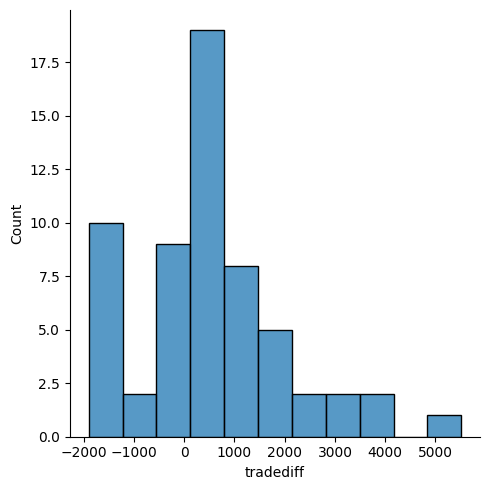

In [28]:
sns.displot(temp[temp['tradeType'] == 'sell']['tradediff'])

In [10]:
figs['alltime']

## Backtest MAEVE strategy with Optuna

In [ ]:
params = {
            'func': 'self.maeve2_t3_backtest_obj', 
            'n_trials': 100000, 
            'timeout': (6*60*60), 
            'n_jobs': -1, 
            'show_progress_bar': True
            }

bt_ = bt.BackTester(btc_df, mode="opt")

study = bt_.run_maeve_backtest_opt(params=params)

In [ ]:
best_params = study.best_trial.params

print(f"\tBest Performance: {study.best_value:.5f} %")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

## Save Optuna Study

In [ ]:
optuna_df = pd.DataFrame()

metric = []
MA1 = []
MA2 = []
mult1 = []
ATR1 = []
MA3 = []
MA4 = []
mult2 = []
ATR2 = []
stoploss = []
streaklim = []
trailing = []

for result in study.trials:
    if result.values:
        metric.append(result.values[0])
        MA1.append(result.params['MA1'])
        MA2.append(result.params['MA2'])
        mult1.append(result.params['mult1'])
        ATR1.append(result.params['ATR1'])
        MA3.append(result.params['MA3'])
        MA4.append(result.params['MA4'])
        mult2.append(result.params['mult2'])
        ATR2.append(result.params['ATR2'])
        stoploss.append(result.params['stoploss'])
        streaklim.append(result.params['streaklim'])
        trailing.append(result.params['trailing'])
        

optuna_df['MA1'] = MA1
optuna_df['MA2'] = MA2
optuna_df['mult1'] = mult1
optuna_df['ATR1'] = ATR1
optuna_df['MA3'] = MA3
optuna_df['MA4'] = MA4
optuna_df['mult2'] = mult2
optuna_df['ATR2'] = ATR2
optuna_df['stoploss'] = stoploss
optuna_df['streaklim'] = streaklim
optuna_df['trailing'] = trailing
optuna_df['yield'] = metric


In [ ]:
optuna_df.sort_values(by=['yield'], ascending=False).head()

In [ ]:
temp = optuna_df[optuna_df['yield']>90].drop_duplicates().copy()
temp.shape

In [ ]:
path = data_loc + "optuna_maeve2_t3.csv"

optuna_df.to_csv(path, index=False)

In [ ]:
path = data_loc + "optuna_maeve2_t3.pkl"

bt1.pickle_dump(path, study)

## Optuna results

In [ ]:
path = data_loc + "optuna_maeve2_t3.pkl"
study = bt1.pickle_load(path)

In [ ]:
# optuna.importance.get_param_importances(study)

In [ ]:
# optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)